In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('./train_santander.csv', encoding='latin-1')
print(cust_df.shape)
cust_df.head(3)

(76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [4]:
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET']==1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print('unsatisfied ratio: {0:.2f}'.format(unsatisfied_cnt/total_cnt))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied ratio: 0.04


In [5]:
print(cust_df['var3'].value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [6]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print(X_features.shape)

(76020, 369)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()

print(X_train.shape, X_test.shape)
print()
print(y_train.value_counts()/train_cnt)
print()
print(y_test.value_counts()/test_cnt)

(60816, 369) (15204, 369)

0    0.960964
1    0.039036
Name: TARGET, dtype: float64

0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=156)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print(xgb_roc_score)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

In [11]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}

gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC:', xgb_roc_score)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80038	validation_1-auc:0.79818
[1]	validation_0-auc:0.81995	validation_1-auc:0.81649
[2]	validation_0-auc:0.82649	validation_1-auc:0.82081
[3]	validation_0-auc:0.83183	validation_1-auc:0.82450
[4]	validation_0-auc:0.83650	validation_1-auc:0.82830
[5]	validation_0-auc:0.83943	validation_1-auc:0.83588
[6]	validation_0-auc:0.83793	validation_1-auc:0.83169
[7]	validation_0-auc:0.84466	validation_1-auc:0.83748
[8]	validation_0-auc:0.84785	validation_1-auc:0.83735
[9]	validation_0-auc:0.84684	validation_1-auc:0.83529
[10]	validation_0-auc:0.84625	validation_1-auc:0.83278
[11]	validation_0-auc:0.84769	validation_1-auc:0.83157
[12]	validation_0-auc:0.85326	validation_1-auc:0.83573
[13]	validation_0-auc:0.85730	validation_1-auc:0.83839
[14]	validation_0-auc:0.85934	validation_1-auc:0.83892
[15]	validation_0-auc:0.86089	validation_1-auc:0.83844
[16]	validation_0-auc:0.86256	validation_1-auc:0.83932
[17]	validation_0-auc:0.86398	validation_1-auc:0.83871
[18]	validation_0-au

[14]	validation_0-auc:0.86081	validation_1-auc:0.84093
[15]	validation_0-auc:0.86262	validation_1-auc:0.84069
[16]	validation_0-auc:0.86438	validation_1-auc:0.84129
[17]	validation_0-auc:0.86582	validation_1-auc:0.84054
[18]	validation_0-auc:0.86660	validation_1-auc:0.84019
[19]	validation_0-auc:0.86816	validation_1-auc:0.83925
[20]	validation_0-auc:0.86872	validation_1-auc:0.83902
[21]	validation_0-auc:0.86926	validation_1-auc:0.83853
[22]	validation_0-auc:0.87020	validation_1-auc:0.83887
[23]	validation_0-auc:0.87138	validation_1-auc:0.83898
[24]	validation_0-auc:0.87192	validation_1-auc:0.83943
[25]	validation_0-auc:0.87267	validation_1-auc:0.83958
[26]	validation_0-auc:0.87390	validation_1-auc:0.83941
[27]	validation_0-auc:0.87466	validation_1-auc:0.83954
[28]	validation_0-auc:0.87477	validation_1-auc:0.83958
[29]	validation_0-auc:0.87518	validation_1-auc:0.83951
[30]	validation_0-auc:0.87583	validation_1-auc:0.83913
[31]	validation_0-auc:0.87665	validation_1-auc:0.83859
[32]	valid

[15]	validation_0-auc:0.86035	validation_1-auc:0.84141
[16]	validation_0-auc:0.86170	validation_1-auc:0.84277
[17]	validation_0-auc:0.86261	validation_1-auc:0.84241
[18]	validation_0-auc:0.86332	validation_1-auc:0.84189
[19]	validation_0-auc:0.86468	validation_1-auc:0.84155
[20]	validation_0-auc:0.86554	validation_1-auc:0.84142
[21]	validation_0-auc:0.86602	validation_1-auc:0.84093
[22]	validation_0-auc:0.86679	validation_1-auc:0.84153
[23]	validation_0-auc:0.86744	validation_1-auc:0.84176
[24]	validation_0-auc:0.86781	validation_1-auc:0.84101
[25]	validation_0-auc:0.86901	validation_1-auc:0.84009
[26]	validation_0-auc:0.87031	validation_1-auc:0.84028
[27]	validation_0-auc:0.87125	validation_1-auc:0.84040
[28]	validation_0-auc:0.87151	validation_1-auc:0.84015
[29]	validation_0-auc:0.87236	validation_1-auc:0.83980
[30]	validation_0-auc:0.87280	validation_1-auc:0.83951
[31]	validation_0-auc:0.87337	validation_1-auc:0.83966
[32]	validation_0-auc:0.87373	validation_1-auc:0.83976
[33]	valid

[18]	validation_0-auc:0.86406	validation_1-auc:0.84200
[19]	validation_0-auc:0.86509	validation_1-auc:0.84225
[20]	validation_0-auc:0.86583	validation_1-auc:0.84202
[21]	validation_0-auc:0.86649	validation_1-auc:0.84154
[22]	validation_0-auc:0.86789	validation_1-auc:0.84130
[23]	validation_0-auc:0.86875	validation_1-auc:0.84070
[24]	validation_0-auc:0.86963	validation_1-auc:0.84129
[25]	validation_0-auc:0.87029	validation_1-auc:0.84082
[26]	validation_0-auc:0.87152	validation_1-auc:0.83990
[27]	validation_0-auc:0.87202	validation_1-auc:0.83942
[28]	validation_0-auc:0.87225	validation_1-auc:0.83959
[29]	validation_0-auc:0.87310	validation_1-auc:0.83948
[30]	validation_0-auc:0.87336	validation_1-auc:0.83930
[31]	validation_0-auc:0.87396	validation_1-auc:0.83927
[32]	validation_0-auc:0.87499	validation_1-auc:0.83895
[33]	validation_0-auc:0.87511	validation_1-auc:0.83896
[34]	validation_0-auc:0.87595	validation_1-auc:0.83959
[35]	validation_0-auc:0.87700	validation_1-auc:0.83873
[36]	valid

[27]	validation_0-auc:0.89849	validation_1-auc:0.83885
[28]	validation_0-auc:0.89880	validation_1-auc:0.83913
[29]	validation_0-auc:0.89981	validation_1-auc:0.83865
[30]	validation_0-auc:0.90069	validation_1-auc:0.83884
[31]	validation_0-auc:0.90132	validation_1-auc:0.83787
[32]	validation_0-auc:0.90165	validation_1-auc:0.83734
[33]	validation_0-auc:0.90202	validation_1-auc:0.83749
[34]	validation_0-auc:0.90287	validation_1-auc:0.83740
[35]	validation_0-auc:0.90325	validation_1-auc:0.83765
[36]	validation_0-auc:0.90351	validation_1-auc:0.83767
[37]	validation_0-auc:0.90373	validation_1-auc:0.83737
[38]	validation_0-auc:0.90389	validation_1-auc:0.83727
[39]	validation_0-auc:0.90420	validation_1-auc:0.83715
[40]	validation_0-auc:0.90430	validation_1-auc:0.83716
[41]	validation_0-auc:0.90535	validation_1-auc:0.83669
[42]	validation_0-auc:0.90598	validation_1-auc:0.83662
[43]	validation_0-auc:0.90643	validation_1-auc:0.83646
[0]	validation_0-auc:0.82030	validation_1-auc:0.81629
[1]	validat

[42]	validation_0-auc:0.89673	validation_1-auc:0.83590
[43]	validation_0-auc:0.89700	validation_1-auc:0.83579
[44]	validation_0-auc:0.89776	validation_1-auc:0.83524
[0]	validation_0-auc:0.81707	validation_1-auc:0.81668
[1]	validation_0-auc:0.83059	validation_1-auc:0.82461
[2]	validation_0-auc:0.83731	validation_1-auc:0.82740
[3]	validation_0-auc:0.84251	validation_1-auc:0.82901
[4]	validation_0-auc:0.84709	validation_1-auc:0.82948
[5]	validation_0-auc:0.85009	validation_1-auc:0.83382
[6]	validation_0-auc:0.85057	validation_1-auc:0.82627
[7]	validation_0-auc:0.85827	validation_1-auc:0.83007
[8]	validation_0-auc:0.86455	validation_1-auc:0.83361
[9]	validation_0-auc:0.86340	validation_1-auc:0.83205
[10]	validation_0-auc:0.86263	validation_1-auc:0.83078
[11]	validation_0-auc:0.86316	validation_1-auc:0.82911
[12]	validation_0-auc:0.86958	validation_1-auc:0.83375
[13]	validation_0-auc:0.87384	validation_1-auc:0.83608
[14]	validation_0-auc:0.87670	validation_1-auc:0.83822
[15]	validation_0-au

[4]	validation_0-auc:0.84814	validation_1-auc:0.83158
[5]	validation_0-auc:0.85204	validation_1-auc:0.83567
[6]	validation_0-auc:0.85209	validation_1-auc:0.83069
[7]	validation_0-auc:0.86086	validation_1-auc:0.83681
[8]	validation_0-auc:0.86762	validation_1-auc:0.83791
[9]	validation_0-auc:0.86651	validation_1-auc:0.83835
[10]	validation_0-auc:0.86632	validation_1-auc:0.83648
[11]	validation_0-auc:0.86635	validation_1-auc:0.83540
[12]	validation_0-auc:0.87323	validation_1-auc:0.83879
[13]	validation_0-auc:0.87674	validation_1-auc:0.84000
[14]	validation_0-auc:0.87881	validation_1-auc:0.84150
[15]	validation_0-auc:0.88009	validation_1-auc:0.84063
[16]	validation_0-auc:0.88204	validation_1-auc:0.84153
[17]	validation_0-auc:0.88346	validation_1-auc:0.84109
[18]	validation_0-auc:0.88420	validation_1-auc:0.84169
[19]	validation_0-auc:0.88585	validation_1-auc:0.84125
[20]	validation_0-auc:0.88654	validation_1-auc:0.84099
[21]	validation_0-auc:0.88767	validation_1-auc:0.83974
[22]	validation_

[8]	validation_0-auc:0.84879	validation_1-auc:0.83601
[9]	validation_0-auc:0.85137	validation_1-auc:0.84014
[10]	validation_0-auc:0.85217	validation_1-auc:0.83916
[11]	validation_0-auc:0.85200	validation_1-auc:0.83724
[12]	validation_0-auc:0.85661	validation_1-auc:0.83892
[13]	validation_0-auc:0.86007	validation_1-auc:0.84146
[14]	validation_0-auc:0.86206	validation_1-auc:0.84135
[15]	validation_0-auc:0.86440	validation_1-auc:0.84157
[16]	validation_0-auc:0.86560	validation_1-auc:0.84169
[17]	validation_0-auc:0.86681	validation_1-auc:0.84139
[18]	validation_0-auc:0.86739	validation_1-auc:0.84111
[19]	validation_0-auc:0.86874	validation_1-auc:0.84064
[20]	validation_0-auc:0.86966	validation_1-auc:0.84041
[21]	validation_0-auc:0.87071	validation_1-auc:0.83990
[22]	validation_0-auc:0.87179	validation_1-auc:0.83893
[23]	validation_0-auc:0.87304	validation_1-auc:0.83900
[24]	validation_0-auc:0.87385	validation_1-auc:0.83901
[25]	validation_0-auc:0.87489	validation_1-auc:0.83932
[26]	validat

[24]	validation_0-auc:0.87022	validation_1-auc:0.83677
[25]	validation_0-auc:0.87042	validation_1-auc:0.83707
[26]	validation_0-auc:0.87080	validation_1-auc:0.83697
[27]	validation_0-auc:0.87118	validation_1-auc:0.83686
[28]	validation_0-auc:0.87255	validation_1-auc:0.83661
[29]	validation_0-auc:0.87276	validation_1-auc:0.83686
[30]	validation_0-auc:0.87302	validation_1-auc:0.83694
[31]	validation_0-auc:0.87365	validation_1-auc:0.83649
[32]	validation_0-auc:0.87422	validation_1-auc:0.83628
[33]	validation_0-auc:0.87448	validation_1-auc:0.83619
[34]	validation_0-auc:0.87487	validation_1-auc:0.83614
[35]	validation_0-auc:0.87491	validation_1-auc:0.83610
[36]	validation_0-auc:0.87506	validation_1-auc:0.83601
[37]	validation_0-auc:0.87634	validation_1-auc:0.83629
[38]	validation_0-auc:0.87671	validation_1-auc:0.83625
[39]	validation_0-auc:0.87679	validation_1-auc:0.83635
[40]	validation_0-auc:0.87704	validation_1-auc:0.83598
[41]	validation_0-auc:0.87730	validation_1-auc:0.83614
[42]	valid

[40]	validation_0-auc:0.87299	validation_1-auc:0.83772
[41]	validation_0-auc:0.87301	validation_1-auc:0.83779
[42]	validation_0-auc:0.87347	validation_1-auc:0.83801
[43]	validation_0-auc:0.87413	validation_1-auc:0.83806
[44]	validation_0-auc:0.87437	validation_1-auc:0.83775
[45]	validation_0-auc:0.87449	validation_1-auc:0.83769
[46]	validation_0-auc:0.87566	validation_1-auc:0.83731
[47]	validation_0-auc:0.87629	validation_1-auc:0.83738
[0]	validation_0-auc:0.81985	validation_1-auc:0.81459
[1]	validation_0-auc:0.82656	validation_1-auc:0.82093
[2]	validation_0-auc:0.83133	validation_1-auc:0.82408
[3]	validation_0-auc:0.83445	validation_1-auc:0.82663
[4]	validation_0-auc:0.83803	validation_1-auc:0.82830
[5]	validation_0-auc:0.84362	validation_1-auc:0.83190
[6]	validation_0-auc:0.84552	validation_1-auc:0.83366
[7]	validation_0-auc:0.84782	validation_1-auc:0.83332
[8]	validation_0-auc:0.85066	validation_1-auc:0.83346
[9]	validation_0-auc:0.85283	validation_1-auc:0.83601
[10]	validation_0-au

[3]	validation_0-auc:0.84568	validation_1-auc:0.83061
[4]	validation_0-auc:0.85124	validation_1-auc:0.82996
[5]	validation_0-auc:0.85564	validation_1-auc:0.83677
[6]	validation_0-auc:0.86115	validation_1-auc:0.83678
[7]	validation_0-auc:0.86413	validation_1-auc:0.83719
[8]	validation_0-auc:0.86599	validation_1-auc:0.83728
[9]	validation_0-auc:0.86928	validation_1-auc:0.83872
[10]	validation_0-auc:0.87174	validation_1-auc:0.83869
[11]	validation_0-auc:0.87115	validation_1-auc:0.83684
[12]	validation_0-auc:0.87911	validation_1-auc:0.83800
[13]	validation_0-auc:0.88263	validation_1-auc:0.83817
[14]	validation_0-auc:0.88487	validation_1-auc:0.83946
[15]	validation_0-auc:0.88721	validation_1-auc:0.83726
[16]	validation_0-auc:0.89026	validation_1-auc:0.83736
[17]	validation_0-auc:0.89140	validation_1-auc:0.83689
[18]	validation_0-auc:0.89265	validation_1-auc:0.83649
[19]	validation_0-auc:0.89387	validation_1-auc:0.83586
[20]	validation_0-auc:0.89470	validation_1-auc:0.83481
[21]	validation_0

[19]	validation_0-auc:0.88454	validation_1-auc:0.83592
[20]	validation_0-auc:0.88517	validation_1-auc:0.83543
[21]	validation_0-auc:0.88562	validation_1-auc:0.83571
[22]	validation_0-auc:0.88698	validation_1-auc:0.83520
[23]	validation_0-auc:0.88758	validation_1-auc:0.83538
[24]	validation_0-auc:0.88823	validation_1-auc:0.83571
[25]	validation_0-auc:0.88895	validation_1-auc:0.83561
[26]	validation_0-auc:0.89035	validation_1-auc:0.83511
[27]	validation_0-auc:0.89188	validation_1-auc:0.83444
[28]	validation_0-auc:0.89213	validation_1-auc:0.83430
[29]	validation_0-auc:0.89316	validation_1-auc:0.83369
[30]	validation_0-auc:0.89408	validation_1-auc:0.83262
[31]	validation_0-auc:0.89463	validation_1-auc:0.83154
[32]	validation_0-auc:0.89515	validation_1-auc:0.83160
[33]	validation_0-auc:0.89519	validation_1-auc:0.83157
[34]	validation_0-auc:0.89541	validation_1-auc:0.83138
[35]	validation_0-auc:0.89571	validation_1-auc:0.83108
[36]	validation_0-auc:0.89591	validation_1-auc:0.83088
[37]	valid

[43]	validation_0-auc:0.89678	validation_1-auc:0.83967
[44]	validation_0-auc:0.89721	validation_1-auc:0.83964
[45]	validation_0-auc:0.89822	validation_1-auc:0.83961
[0]	validation_0-auc:0.82505	validation_1-auc:0.81749
[1]	validation_0-auc:0.83539	validation_1-auc:0.82056
[2]	validation_0-auc:0.84105	validation_1-auc:0.82687
[3]	validation_0-auc:0.84639	validation_1-auc:0.82992
[4]	validation_0-auc:0.85173	validation_1-auc:0.83355
[5]	validation_0-auc:0.85342	validation_1-auc:0.83664
[6]	validation_0-auc:0.85822	validation_1-auc:0.83831
[7]	validation_0-auc:0.86311	validation_1-auc:0.83925
[8]	validation_0-auc:0.86680	validation_1-auc:0.83996
[9]	validation_0-auc:0.87020	validation_1-auc:0.84141
[10]	validation_0-auc:0.87123	validation_1-auc:0.84197
[11]	validation_0-auc:0.87144	validation_1-auc:0.84052
[12]	validation_0-auc:0.87570	validation_1-auc:0.84172
[13]	validation_0-auc:0.87820	validation_1-auc:0.84272
[14]	validation_0-auc:0.87999	validation_1-auc:0.84407
[15]	validation_0-au

In [12]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.2, max_depths=5, 
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric='auc', eval_set=[(X_train, y_train),(X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC:', xgb_roc_score)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:48:11] WARNING: ..\src\learner.cc:541: 
Parameters: { max_depths } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.72720	validation_1-auc:0.73519
[1]	validation_0-auc:0.81160	validation_1-auc:0.80723
[2]	validation_0-auc:0.81817	validation_1-auc:0.81284
[3]	validation_0-auc:0.81859	validation_1-auc:0.80719
[4]	validation_0-auc:0.83361	validation_1-auc:0.82220
[5]	validation_0-auc:0.84035	validation_1-auc:0.82735
[6]	validation_0-auc:0.84730	validation_1-auc:0.83361
[7]	validation_0-auc:0.85043	validation_1-auc:0.83591
[8]	validation_0-auc:0.85317	validation_1-auc:0.83584
[9]	validation_0-auc:0.85330	validation_1-auc:0.83520
[10]	validation_0-auc:0.85645	validation_1-auc:0.83812
[11]	validation_0-auc:0.85636	validation_1-auc:0.83689
[12]	validation_0-au

[143]	validation_0-auc:0.93112	validation_1-auc:0.83379
[144]	validation_0-auc:0.93118	validation_1-auc:0.83368
[145]	validation_0-auc:0.93130	validation_1-auc:0.83371
[146]	validation_0-auc:0.93176	validation_1-auc:0.83334
[147]	validation_0-auc:0.93202	validation_1-auc:0.83308
[148]	validation_0-auc:0.93276	validation_1-auc:0.83265
[149]	validation_0-auc:0.93300	validation_1-auc:0.83270
[150]	validation_0-auc:0.93340	validation_1-auc:0.83239
[151]	validation_0-auc:0.93362	validation_1-auc:0.83230
[152]	validation_0-auc:0.93417	validation_1-auc:0.83227
[153]	validation_0-auc:0.93470	validation_1-auc:0.83233
[154]	validation_0-auc:0.93477	validation_1-auc:0.83245
[155]	validation_0-auc:0.93489	validation_1-auc:0.83243
[156]	validation_0-auc:0.93569	validation_1-auc:0.83230
[157]	validation_0-auc:0.93622	validation_1-auc:0.83182
[158]	validation_0-auc:0.93639	validation_1-auc:0.83165
[159]	validation_0-auc:0.93673	validation_1-auc:0.83152
[160]	validation_0-auc:0.93686	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

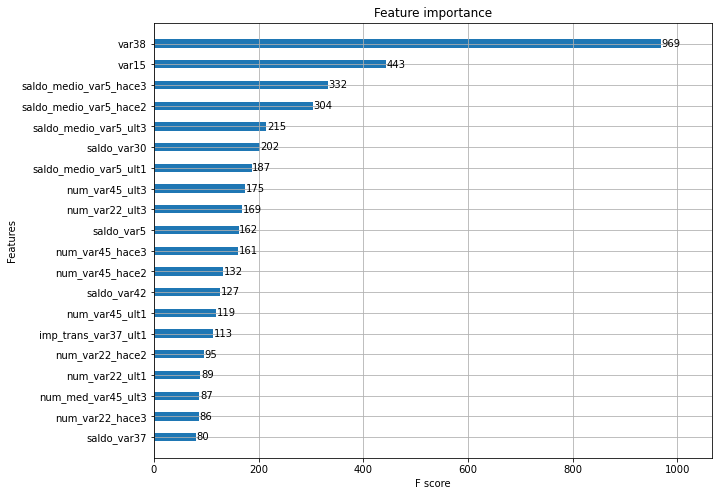

In [13]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [18]:
# LightGBM model training and hyper parameter tunning
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print(lgbm_roc_score)


[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

In [19]:
from sklearn.model_selection import GridSearchCV

LGBM_clf = LGBMClassifier(n_estimators=200)

params = {
    'num_leaves': [32, 64],
    'max_depth': [128, 160],
    'min_child_samples': [60, 100],
    'subsample': [0.8, 1]
}

gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('best param:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('roc auc:', lgbm_roc_score)

[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's auc: 0.834593	valid_1's binary_logloss: 0.150797
[6]	valid_0's auc: 0.845253	valid_0's binary_logloss: 0.139712	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149062
[7]	valid_0's auc: 0.846545	valid_0's binary_logloss: 0.138053	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.147537
[8]	valid_0's auc: 0.848885	valid_0's binary_logloss: 0.1366	valid_1's auc: 0.838153	val

[26]	valid_0's auc: 0.872886	valid_0's binary_logloss: 0.125108	valid_1's auc: 0.836911	valid_1's binary_logloss: 0.140274
[27]	valid_0's auc: 0.873971	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.836733	valid_1's binary_logloss: 0.140247
[28]	valid_0's auc: 0.875129	valid_0's binary_logloss: 0.124434	valid_1's auc: 0.837012	valid_1's binary_logloss: 0.140143
[29]	valid_0's auc: 0.875873	valid_0's binary_logloss: 0.12414	valid_1's auc: 0.836866	valid_1's binary_logloss: 0.140163
[30]	valid_0's auc: 0.876465	valid_0's binary_logloss: 0.123865	valid_1's auc: 0.836337	valid_1's binary_logloss: 0.140195
[31]	valid_0's auc: 0.877699	valid_0's binary_logloss: 0.123521	valid_1's auc: 0.836229	valid_1's binary_logloss: 0.140186
[32]	valid_0's auc: 0.878492	valid_0's binary_logloss: 0.123253	valid_1's auc: 0.836388	valid_1's binary_logloss: 0.140145
[33]	valid_0's auc: 0.879281	valid_0's binary_logloss: 0.122981	valid_1's auc: 0.836061	valid_1's binary_logloss: 0.140165
[34]	valid_0's au

[23]	valid_0's auc: 0.870018	valid_0's binary_logloss: 0.126051	valid_1's auc: 0.838851	valid_1's binary_logloss: 0.140113
[24]	valid_0's auc: 0.871076	valid_0's binary_logloss: 0.125665	valid_1's auc: 0.838918	valid_1's binary_logloss: 0.139963
[25]	valid_0's auc: 0.871808	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139886
[26]	valid_0's auc: 0.872679	valid_0's binary_logloss: 0.124953	valid_1's auc: 0.838853	valid_1's binary_logloss: 0.139811
[27]	valid_0's auc: 0.873565	valid_0's binary_logloss: 0.124623	valid_1's auc: 0.838679	valid_1's binary_logloss: 0.139786
[28]	valid_0's auc: 0.874397	valid_0's binary_logloss: 0.124307	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139815
[29]	valid_0's auc: 0.87544	valid_0's binary_logloss: 0.124018	valid_1's auc: 0.837719	valid_1's binary_logloss: 0.139819
[30]	valid_0's auc: 0.876222	valid_0's binary_logloss: 0.123733	valid_1's auc: 0.838003	valid_1's binary_logloss: 0.139778
[31]	valid_0's auc:

[46]	valid_0's auc: 0.890166	valid_0's binary_logloss: 0.119099	valid_1's auc: 0.839346	valid_1's binary_logloss: 0.139475
[47]	valid_0's auc: 0.890678	valid_0's binary_logloss: 0.118869	valid_1's auc: 0.839761	valid_1's binary_logloss: 0.1394
[48]	valid_0's auc: 0.891058	valid_0's binary_logloss: 0.118665	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139409
[49]	valid_0's auc: 0.891635	valid_0's binary_logloss: 0.118425	valid_1's auc: 0.839754	valid_1's binary_logloss: 0.139428
[50]	valid_0's auc: 0.892346	valid_0's binary_logloss: 0.118168	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.139501
[51]	valid_0's auc: 0.892736	valid_0's binary_logloss: 0.117984	valid_1's auc: 0.839121	valid_1's binary_logloss: 0.139524
[52]	valid_0's auc: 0.893171	valid_0's binary_logloss: 0.117764	valid_1's auc: 0.838794	valid_1's binary_logloss: 0.139586
[53]	valid_0's auc: 0.893573	valid_0's binary_logloss: 0.117568	valid_1's auc: 0.838694	valid_1's binary_logloss: 0.139581
[54]	valid_0's auc

[21]	valid_0's auc: 0.867294	valid_0's binary_logloss: 0.12703	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.140825
[22]	valid_0's auc: 0.86828	valid_0's binary_logloss: 0.126598	valid_1's auc: 0.836515	valid_1's binary_logloss: 0.140741
[23]	valid_0's auc: 0.869182	valid_0's binary_logloss: 0.126269	valid_1's auc: 0.836587	valid_1's binary_logloss: 0.140588
[24]	valid_0's auc: 0.869979	valid_0's binary_logloss: 0.125886	valid_1's auc: 0.836766	valid_1's binary_logloss: 0.140496
[25]	valid_0's auc: 0.870956	valid_0's binary_logloss: 0.125545	valid_1's auc: 0.837001	valid_1's binary_logloss: 0.140322
[26]	valid_0's auc: 0.872886	valid_0's binary_logloss: 0.125108	valid_1's auc: 0.836911	valid_1's binary_logloss: 0.140274
[27]	valid_0's auc: 0.873971	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.836733	valid_1's binary_logloss: 0.140247
[28]	valid_0's auc: 0.875129	valid_0's binary_logloss: 0.124434	valid_1's auc: 0.837012	valid_1's binary_logloss: 0.140143
[29]	valid_0's auc

[21]	valid_0's auc: 0.868305	valid_0's binary_logloss: 0.126848	valid_1's auc: 0.839642	valid_1's binary_logloss: 0.140335
[22]	valid_0's auc: 0.869367	valid_0's binary_logloss: 0.126428	valid_1's auc: 0.839045	valid_1's binary_logloss: 0.140242
[23]	valid_0's auc: 0.870018	valid_0's binary_logloss: 0.126051	valid_1's auc: 0.838851	valid_1's binary_logloss: 0.140113
[24]	valid_0's auc: 0.871076	valid_0's binary_logloss: 0.125665	valid_1's auc: 0.838918	valid_1's binary_logloss: 0.139963
[25]	valid_0's auc: 0.871808	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139886
[26]	valid_0's auc: 0.872679	valid_0's binary_logloss: 0.124953	valid_1's auc: 0.838853	valid_1's binary_logloss: 0.139811
[27]	valid_0's auc: 0.873565	valid_0's binary_logloss: 0.124623	valid_1's auc: 0.838679	valid_1's binary_logloss: 0.139786
[28]	valid_0's auc: 0.874397	valid_0's binary_logloss: 0.124307	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139815
[29]	valid_0's auc

[50]	valid_0's auc: 0.892346	valid_0's binary_logloss: 0.118168	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.139501
[51]	valid_0's auc: 0.892736	valid_0's binary_logloss: 0.117984	valid_1's auc: 0.839121	valid_1's binary_logloss: 0.139524
[52]	valid_0's auc: 0.893171	valid_0's binary_logloss: 0.117764	valid_1's auc: 0.838794	valid_1's binary_logloss: 0.139586
[53]	valid_0's auc: 0.893573	valid_0's binary_logloss: 0.117568	valid_1's auc: 0.838694	valid_1's binary_logloss: 0.139581
[54]	valid_0's auc: 0.894147	valid_0's binary_logloss: 0.117322	valid_1's auc: 0.838487	valid_1's binary_logloss: 0.139606
[55]	valid_0's auc: 0.894518	valid_0's binary_logloss: 0.117157	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.139538
[56]	valid_0's auc: 0.894919	valid_0's binary_logloss: 0.116983	valid_1's auc: 0.838866	valid_1's binary_logloss: 0.139562
[57]	valid_0's auc: 0.895096	valid_0's binary_logloss: 0.116832	valid_1's auc: 0.838982	valid_1's binary_logloss: 0.139544
[58]	valid_0's a

[16]	valid_0's auc: 0.878987	valid_0's binary_logloss: 0.124805	valid_1's auc: 0.834644	valid_1's binary_logloss: 0.142102
[17]	valid_0's auc: 0.880532	valid_0's binary_logloss: 0.124054	valid_1's auc: 0.833893	valid_1's binary_logloss: 0.141884
[18]	valid_0's auc: 0.882045	valid_0's binary_logloss: 0.123344	valid_1's auc: 0.833575	valid_1's binary_logloss: 0.141697
[19]	valid_0's auc: 0.883566	valid_0's binary_logloss: 0.122594	valid_1's auc: 0.832707	valid_1's binary_logloss: 0.141615
[20]	valid_0's auc: 0.885585	valid_0's binary_logloss: 0.121869	valid_1's auc: 0.833151	valid_1's binary_logloss: 0.141426
[21]	valid_0's auc: 0.887553	valid_0's binary_logloss: 0.121164	valid_1's auc: 0.834052	valid_1's binary_logloss: 0.141225
[22]	valid_0's auc: 0.88866	valid_0's binary_logloss: 0.120577	valid_1's auc: 0.834098	valid_1's binary_logloss: 0.141029
[23]	valid_0's auc: 0.889845	valid_0's binary_logloss: 0.11997	valid_1's auc: 0.833894	valid_1's binary_logloss: 0.140951
[24]	valid_0's auc

[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840688	valid_0's binary_logloss: 0.14972	valid_1's auc: 0.825893	valid_1's binary_logloss: 0.159538
[3]	valid_0's auc: 0.847811	valid_0's binary_logloss: 0.145576	valid_1's auc: 0.832086	valid_1's binary_logloss: 0.155889
[4]	valid_0's auc: 0.85262	valid_0's binary_logloss: 0.142266	valid_1's auc: 0.83348	valid_1's binary_logloss: 0.153059
[5]	valid_0's auc: 0.856853	valid_0's binary_logloss: 0.139575	valid_1's auc: 0.837158	valid_1's binary_logloss: 0.150847
[6]	valid_0's auc: 0.859779	valid_0's binary_logloss: 0.13732	valid_1's auc: 0.839471	valid_1's binary_logloss: 0.148924
[7]	valid_0's auc: 0.861819	valid_0's binary_logloss: 0.135402	valid_1's auc: 0.838324	valid_1's binary_logloss: 0.147505
[8]	valid_0's auc: 0.863714	valid_0's binary_logloss: 0.133757	valid_1's auc: 0.838679	va

[19]	valid_0's auc: 0.885618	valid_0's binary_logloss: 0.122288	valid_1's auc: 0.841595	valid_1's binary_logloss: 0.140038
[20]	valid_0's auc: 0.887262	valid_0's binary_logloss: 0.12156	valid_1's auc: 0.841475	valid_1's binary_logloss: 0.13984
[21]	valid_0's auc: 0.888549	valid_0's binary_logloss: 0.120864	valid_1's auc: 0.841698	valid_1's binary_logloss: 0.139644
[22]	valid_0's auc: 0.889783	valid_0's binary_logloss: 0.120226	valid_1's auc: 0.841265	valid_1's binary_logloss: 0.139524
[23]	valid_0's auc: 0.891007	valid_0's binary_logloss: 0.119647	valid_1's auc: 0.840909	valid_1's binary_logloss: 0.139463
[24]	valid_0's auc: 0.892111	valid_0's binary_logloss: 0.11912	valid_1's auc: 0.840884	valid_1's binary_logloss: 0.13939
[25]	valid_0's auc: 0.892959	valid_0's binary_logloss: 0.118644	valid_1's auc: 0.840779	valid_1's binary_logloss: 0.139336
[26]	valid_0's auc: 0.894356	valid_0's binary_logloss: 0.118128	valid_1's auc: 0.841299	valid_1's binary_logloss: 0.139198
[27]	valid_0's auc: 

[1]	valid_0's auc: 0.832082	valid_0's binary_logloss: 0.155469	valid_1's auc: 0.814834	valid_1's binary_logloss: 0.164811
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840358	valid_0's binary_logloss: 0.149705	valid_1's auc: 0.821	valid_1's binary_logloss: 0.159739
[3]	valid_0's auc: 0.846958	valid_0's binary_logloss: 0.145462	valid_1's auc: 0.829037	valid_1's binary_logloss: 0.155963
[4]	valid_0's auc: 0.850608	valid_0's binary_logloss: 0.142192	valid_1's auc: 0.830664	valid_1's binary_logloss: 0.153305
[5]	valid_0's auc: 0.857054	valid_0's binary_logloss: 0.139496	valid_1's auc: 0.834255	valid_1's binary_logloss: 0.150999
[6]	valid_0's auc: 0.860917	valid_0's binary_logloss: 0.137183	valid_1's auc: 0.837251	valid_1's binary_logloss: 0.149102
[7]	valid_0's auc: 0.862765	valid_0's binary_logloss: 0.135234	valid_1's auc: 0.838397	valid_1's binary_logloss: 0.14754
[8]	valid_0's auc: 0.865325	valid_0's binary_logloss: 0.133564	valid_1's auc: 0.83904	val

[32]	valid_0's auc: 0.900529	valid_0's binary_logloss: 0.115374	valid_1's auc: 0.836541	valid_1's binary_logloss: 0.139496
[33]	valid_0's auc: 0.90188	valid_0's binary_logloss: 0.114972	valid_1's auc: 0.837021	valid_1's binary_logloss: 0.139413
[34]	valid_0's auc: 0.902879	valid_0's binary_logloss: 0.114528	valid_1's auc: 0.836909	valid_1's binary_logloss: 0.13943
[35]	valid_0's auc: 0.903932	valid_0's binary_logloss: 0.114157	valid_1's auc: 0.836592	valid_1's binary_logloss: 0.139458
[36]	valid_0's auc: 0.904707	valid_0's binary_logloss: 0.113777	valid_1's auc: 0.836824	valid_1's binary_logloss: 0.139459
[37]	valid_0's auc: 0.905376	valid_0's binary_logloss: 0.113446	valid_1's auc: 0.836614	valid_1's binary_logloss: 0.139503
[38]	valid_0's auc: 0.906535	valid_0's binary_logloss: 0.11295	valid_1's auc: 0.836328	valid_1's binary_logloss: 0.139575
[39]	valid_0's auc: 0.907125	valid_0's binary_logloss: 0.112599	valid_1's auc: 0.83631	valid_1's binary_logloss: 0.139598
[40]	valid_0's auc: 

[17]	valid_0's auc: 0.883582	valid_0's binary_logloss: 0.123652	valid_1's auc: 0.841626	valid_1's binary_logloss: 0.1405
[18]	valid_0's auc: 0.884494	valid_0's binary_logloss: 0.122936	valid_1's auc: 0.841739	valid_1's binary_logloss: 0.140193
[19]	valid_0's auc: 0.885618	valid_0's binary_logloss: 0.122288	valid_1's auc: 0.841595	valid_1's binary_logloss: 0.140038
[20]	valid_0's auc: 0.887262	valid_0's binary_logloss: 0.12156	valid_1's auc: 0.841475	valid_1's binary_logloss: 0.13984
[21]	valid_0's auc: 0.888549	valid_0's binary_logloss: 0.120864	valid_1's auc: 0.841698	valid_1's binary_logloss: 0.139644
[22]	valid_0's auc: 0.889783	valid_0's binary_logloss: 0.120226	valid_1's auc: 0.841265	valid_1's binary_logloss: 0.139524
[23]	valid_0's auc: 0.891007	valid_0's binary_logloss: 0.119647	valid_1's auc: 0.840909	valid_1's binary_logloss: 0.139463
[24]	valid_0's auc: 0.892111	valid_0's binary_logloss: 0.11912	valid_1's auc: 0.840884	valid_1's binary_logloss: 0.13939
[25]	valid_0's auc: 0.

[44]	valid_0's auc: 0.885155	valid_0's binary_logloss: 0.120752	valid_1's auc: 0.835153	valid_1's binary_logloss: 0.139761
Early stopping, best iteration is:
[14]	valid_0's auc: 0.859797	valid_0's binary_logloss: 0.130869	valid_1's auc: 0.839774	valid_1's binary_logloss: 0.141886
[1]	valid_0's auc: 0.822096	valid_0's binary_logloss: 0.15642	valid_1's auc: 0.814231	valid_1's binary_logloss: 0.165423
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830899	valid_0's binary_logloss: 0.151112	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.160161
[3]	valid_0's auc: 0.83949	valid_0's binary_logloss: 0.147196	valid_1's auc: 0.828421	valid_1's binary_logloss: 0.156499
[4]	valid_0's auc: 0.84292	valid_0's binary_logloss: 0.14418	valid_1's auc: 0.831515	valid_1's binary_logloss: 0.153682
[5]	valid_0's auc: 0.846745	valid_0's binary_logloss: 0.141793	valid_1's auc: 0.836391	valid_1's binary_logloss: 0.151366
[6]	valid_0's auc: 0.849204	valid_0's binary_logloss

[45]	valid_0's auc: 0.885417	valid_0's binary_logloss: 0.120493	valid_1's auc: 0.838678	valid_1's binary_logloss: 0.139288
[46]	valid_0's auc: 0.885803	valid_0's binary_logloss: 0.120327	valid_1's auc: 0.838716	valid_1's binary_logloss: 0.139279
[47]	valid_0's auc: 0.886486	valid_0's binary_logloss: 0.120099	valid_1's auc: 0.838668	valid_1's binary_logloss: 0.139274
[48]	valid_0's auc: 0.887253	valid_0's binary_logloss: 0.119903	valid_1's auc: 0.838451	valid_1's binary_logloss: 0.139321
[49]	valid_0's auc: 0.887742	valid_0's binary_logloss: 0.11971	valid_1's auc: 0.838484	valid_1's binary_logloss: 0.139332
[50]	valid_0's auc: 0.888224	valid_0's binary_logloss: 0.119543	valid_1's auc: 0.838409	valid_1's binary_logloss: 0.139353
[51]	valid_0's auc: 0.888667	valid_0's binary_logloss: 0.11938	valid_1's auc: 0.838246	valid_1's binary_logloss: 0.1394
Early stopping, best iteration is:
[21]	valid_0's auc: 0.867585	valid_0's binary_logloss: 0.127262	valid_1's auc: 0.839226	valid_1's binary_log

[22]	valid_0's auc: 0.86912	valid_0's binary_logloss: 0.126786	valid_1's auc: 0.842604	valid_1's binary_logloss: 0.139581
[23]	valid_0's auc: 0.8702	valid_0's binary_logloss: 0.1264	valid_1's auc: 0.842923	valid_1's binary_logloss: 0.13938
[24]	valid_0's auc: 0.871154	valid_0's binary_logloss: 0.126012	valid_1's auc: 0.842853	valid_1's binary_logloss: 0.139199
[25]	valid_0's auc: 0.871861	valid_0's binary_logloss: 0.125716	valid_1's auc: 0.842924	valid_1's binary_logloss: 0.139114
[26]	valid_0's auc: 0.872932	valid_0's binary_logloss: 0.125379	valid_1's auc: 0.842821	valid_1's binary_logloss: 0.139002
[27]	valid_0's auc: 0.873488	valid_0's binary_logloss: 0.125055	valid_1's auc: 0.842803	valid_1's binary_logloss: 0.138866
[28]	valid_0's auc: 0.874282	valid_0's binary_logloss: 0.124763	valid_1's auc: 0.842697	valid_1's binary_logloss: 0.138796
[29]	valid_0's auc: 0.875185	valid_0's binary_logloss: 0.124481	valid_1's auc: 0.843506	valid_1's binary_logloss: 0.138625
[30]	valid_0's auc: 0.

[26]	valid_0's auc: 0.873412	valid_0's binary_logloss: 0.125313	valid_1's auc: 0.836946	valid_1's binary_logloss: 0.139742
[27]	valid_0's auc: 0.874137	valid_0's binary_logloss: 0.124988	valid_1's auc: 0.836586	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874911	valid_0's binary_logloss: 0.124675	valid_1's auc: 0.836489	valid_1's binary_logloss: 0.139742
[29]	valid_0's auc: 0.875538	valid_0's binary_logloss: 0.124397	valid_1's auc: 0.836554	valid_1's binary_logloss: 0.139712
[30]	valid_0's auc: 0.876317	valid_0's binary_logloss: 0.124137	valid_1's auc: 0.836181	valid_1's binary_logloss: 0.139716
[31]	valid_0's auc: 0.87724	valid_0's binary_logloss: 0.123841	valid_1's auc: 0.836284	valid_1's binary_logloss: 0.139683
[32]	valid_0's auc: 0.877783	valid_0's binary_logloss: 0.123594	valid_1's auc: 0.835851	valid_1's binary_logloss: 0.139729
[33]	valid_0's auc: 0.878348	valid_0's binary_logloss: 0.12338	valid_1's auc: 0.835408	valid_1's binary_logloss: 0.139824
[34]	valid_0's auc

[26]	valid_0's auc: 0.871934	valid_0's binary_logloss: 0.12537	valid_1's auc: 0.838594	valid_1's binary_logloss: 0.139669
[27]	valid_0's auc: 0.873048	valid_0's binary_logloss: 0.125049	valid_1's auc: 0.83847	valid_1's binary_logloss: 0.139655
[28]	valid_0's auc: 0.873824	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.838229	valid_1's binary_logloss: 0.139655
[29]	valid_0's auc: 0.874662	valid_0's binary_logloss: 0.124467	valid_1's auc: 0.838445	valid_1's binary_logloss: 0.139579
[30]	valid_0's auc: 0.87542	valid_0's binary_logloss: 0.124168	valid_1's auc: 0.838156	valid_1's binary_logloss: 0.139548
[31]	valid_0's auc: 0.876207	valid_0's binary_logloss: 0.123915	valid_1's auc: 0.838237	valid_1's binary_logloss: 0.139538
[32]	valid_0's auc: 0.877156	valid_0's binary_logloss: 0.123623	valid_1's auc: 0.838271	valid_1's binary_logloss: 0.13947
[33]	valid_0's auc: 0.87768	valid_0's binary_logloss: 0.12338	valid_1's auc: 0.838713	valid_1's binary_logloss: 0.139346
[34]	valid_0's auc: 0.

[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logloss: 0.147372	valid_1's auc: 0.829555	valid_1's binary_logloss: 0.156407
[4]	valid_0's auc: 0.842398	valid_0's binary_logloss: 0.14436	valid_1's auc: 0.833204	valid_1's binary_logloss: 0.153426
[5]	valid_0's auc: 0.84472	valid_0's binary_logloss: 0.141969	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.15118
[6]	valid_0's auc: 0.846873	valid_0's binary_logloss: 0.13984	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.149232
[7]	valid_0's auc: 0.849397	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.838165	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.850636	valid_0's binary_logloss: 0.136651	valid_1's auc: 0.839203	val

[73]	valid_0's auc: 0.899665	valid_0's binary_logloss: 0.115279	valid_1's auc: 0.843158	valid_1's binary_logloss: 0.138606
[74]	valid_0's auc: 0.899872	valid_0's binary_logloss: 0.115145	valid_1's auc: 0.843153	valid_1's binary_logloss: 0.138622
[75]	valid_0's auc: 0.900318	valid_0's binary_logloss: 0.115012	valid_1's auc: 0.8431	valid_1's binary_logloss: 0.138652
[76]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.114797	valid_1's auc: 0.843128	valid_1's binary_logloss: 0.138654
[77]	valid_0's auc: 0.901053	valid_0's binary_logloss: 0.11465	valid_1's auc: 0.843183	valid_1's binary_logloss: 0.138667
[78]	valid_0's auc: 0.901334	valid_0's binary_logloss: 0.114492	valid_1's auc: 0.843036	valid_1's binary_logloss: 0.138728
Early stopping, best iteration is:
[48]	valid_0's auc: 0.889206	valid_0's binary_logloss: 0.119781	valid_1's auc: 0.844708	valid_1's binary_logloss: 0.137947
[1]	valid_0's auc: 0.833136	valid_0's binary_logloss: 0.155618	valid_1's auc: 0.823516	valid_1's binary_log

[32]	valid_0's auc: 0.898106	valid_0's binary_logloss: 0.117027	valid_1's auc: 0.832548	valid_1's binary_logloss: 0.140717
[33]	valid_0's auc: 0.898897	valid_0's binary_logloss: 0.116646	valid_1's auc: 0.832294	valid_1's binary_logloss: 0.140755
[34]	valid_0's auc: 0.899579	valid_0's binary_logloss: 0.11632	valid_1's auc: 0.832478	valid_1's binary_logloss: 0.14074
[35]	valid_0's auc: 0.900941	valid_0's binary_logloss: 0.115884	valid_1's auc: 0.83257	valid_1's binary_logloss: 0.140703
[36]	valid_0's auc: 0.902074	valid_0's binary_logloss: 0.115452	valid_1's auc: 0.832369	valid_1's binary_logloss: 0.140774
[37]	valid_0's auc: 0.902849	valid_0's binary_logloss: 0.115101	valid_1's auc: 0.832046	valid_1's binary_logloss: 0.140792
Early stopping, best iteration is:
[7]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.135927	valid_1's auc: 0.837932	valid_1's binary_logloss: 0.147666
[1]	valid_0's auc: 0.834438	valid_0's binary_logloss: 0.155707	valid_1's auc: 0.821419	valid_1's binary_logl

[36]	valid_0's auc: 0.897535	valid_0's binary_logloss: 0.116484	valid_1's auc: 0.837261	valid_1's binary_logloss: 0.139733
[37]	valid_0's auc: 0.898253	valid_0's binary_logloss: 0.116123	valid_1's auc: 0.837235	valid_1's binary_logloss: 0.139781
[38]	valid_0's auc: 0.898964	valid_0's binary_logloss: 0.115828	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.139841
[39]	valid_0's auc: 0.89972	valid_0's binary_logloss: 0.115476	valid_1's auc: 0.836629	valid_1's binary_logloss: 0.13991
[40]	valid_0's auc: 0.900293	valid_0's binary_logloss: 0.115122	valid_1's auc: 0.837147	valid_1's binary_logloss: 0.139846
[41]	valid_0's auc: 0.900934	valid_0's binary_logloss: 0.114813	valid_1's auc: 0.836986	valid_1's binary_logloss: 0.139923
[42]	valid_0's auc: 0.901636	valid_0's binary_logloss: 0.114489	valid_1's auc: 0.836537	valid_1's binary_logloss: 0.140017
[43]	valid_0's auc: 0.90272	valid_0's binary_logloss: 0.114161	valid_1's auc: 0.836588	valid_1's binary_logloss: 0.140025
[44]	valid_0's auc:

[51]	valid_0's auc: 0.911115	valid_0's binary_logloss: 0.110282	valid_1's auc: 0.838459	valid_1's binary_logloss: 0.139669
[52]	valid_0's auc: 0.911601	valid_0's binary_logloss: 0.10999	valid_1's auc: 0.838303	valid_1's binary_logloss: 0.139708
[53]	valid_0's auc: 0.911908	valid_0's binary_logloss: 0.109751	valid_1's auc: 0.838117	valid_1's binary_logloss: 0.13975
[54]	valid_0's auc: 0.912261	valid_0's binary_logloss: 0.109498	valid_1's auc: 0.838252	valid_1's binary_logloss: 0.139711
[55]	valid_0's auc: 0.912616	valid_0's binary_logloss: 0.109226	valid_1's auc: 0.837936	valid_1's binary_logloss: 0.13983
[56]	valid_0's auc: 0.913202	valid_0's binary_logloss: 0.108936	valid_1's auc: 0.83804	valid_1's binary_logloss: 0.13983
[57]	valid_0's auc: 0.913592	valid_0's binary_logloss: 0.10867	valid_1's auc: 0.838083	valid_1's binary_logloss: 0.139818
[58]	valid_0's auc: 0.913818	valid_0's binary_logloss: 0.108421	valid_1's auc: 0.837716	valid_1's binary_logloss: 0.139971
[59]	valid_0's auc: 0.

[17]	valid_0's auc: 0.879493	valid_0's binary_logloss: 0.125166	valid_1's auc: 0.834462	valid_1's binary_logloss: 0.141684
[18]	valid_0's auc: 0.880697	valid_0's binary_logloss: 0.124485	valid_1's auc: 0.834855	valid_1's binary_logloss: 0.141381
[19]	valid_0's auc: 0.881751	valid_0's binary_logloss: 0.123851	valid_1's auc: 0.83548	valid_1's binary_logloss: 0.141089
[20]	valid_0's auc: 0.883208	valid_0's binary_logloss: 0.123231	valid_1's auc: 0.834617	valid_1's binary_logloss: 0.141074
[21]	valid_0's auc: 0.884441	valid_0's binary_logloss: 0.122672	valid_1's auc: 0.835086	valid_1's binary_logloss: 0.140871
[22]	valid_0's auc: 0.885795	valid_0's binary_logloss: 0.122047	valid_1's auc: 0.834691	valid_1's binary_logloss: 0.140833
[23]	valid_0's auc: 0.88703	valid_0's binary_logloss: 0.121437	valid_1's auc: 0.834867	valid_1's binary_logloss: 0.14067
[24]	valid_0's auc: 0.888628	valid_0's binary_logloss: 0.120866	valid_1's auc: 0.834703	valid_1's binary_logloss: 0.140607
[25]	valid_0's auc:

[20]	valid_0's auc: 0.88095	valid_0's binary_logloss: 0.123758	valid_1's auc: 0.839472	valid_1's binary_logloss: 0.140278
[21]	valid_0's auc: 0.882333	valid_0's binary_logloss: 0.123172	valid_1's auc: 0.839953	valid_1's binary_logloss: 0.139987
[22]	valid_0's auc: 0.883759	valid_0's binary_logloss: 0.122627	valid_1's auc: 0.840172	valid_1's binary_logloss: 0.139783
[23]	valid_0's auc: 0.884939	valid_0's binary_logloss: 0.122106	valid_1's auc: 0.840085	valid_1's binary_logloss: 0.139652
[24]	valid_0's auc: 0.886267	valid_0's binary_logloss: 0.121544	valid_1's auc: 0.839519	valid_1's binary_logloss: 0.13967
[25]	valid_0's auc: 0.887231	valid_0's binary_logloss: 0.12107	valid_1's auc: 0.839583	valid_1's binary_logloss: 0.139554
[26]	valid_0's auc: 0.888362	valid_0's binary_logloss: 0.120592	valid_1's auc: 0.839436	valid_1's binary_logloss: 0.139477
[27]	valid_0's auc: 0.889402	valid_0's binary_logloss: 0.12012	valid_1's auc: 0.839576	valid_1's binary_logloss: 0.139364
[28]	valid_0's auc: 

[34]	valid_0's auc: 0.899242	valid_0's binary_logloss: 0.116054	valid_1's auc: 0.838475	valid_1's binary_logloss: 0.139614
[35]	valid_0's auc: 0.900316	valid_0's binary_logloss: 0.115653	valid_1's auc: 0.838522	valid_1's binary_logloss: 0.13957
[36]	valid_0's auc: 0.901114	valid_0's binary_logloss: 0.11531	valid_1's auc: 0.838721	valid_1's binary_logloss: 0.139537
[37]	valid_0's auc: 0.901919	valid_0's binary_logloss: 0.114911	valid_1's auc: 0.838643	valid_1's binary_logloss: 0.139581
[38]	valid_0's auc: 0.902827	valid_0's binary_logloss: 0.114566	valid_1's auc: 0.839027	valid_1's binary_logloss: 0.139517
[39]	valid_0's auc: 0.903647	valid_0's binary_logloss: 0.114176	valid_1's auc: 0.839264	valid_1's binary_logloss: 0.13948
[40]	valid_0's auc: 0.904461	valid_0's binary_logloss: 0.11382	valid_1's auc: 0.839535	valid_1's binary_logloss: 0.13945
[41]	valid_0's auc: 0.905119	valid_0's binary_logloss: 0.113454	valid_1's auc: 0.839726	valid_1's binary_logloss: 0.139429
[42]	valid_0's auc: 0

[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.151005	valid_1's auc: 0.821376	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837474	valid_0's binary_logloss: 0.147149	valid_1's auc: 0.828229	valid_1's binary_logloss: 0.156519
[4]	valid_0's auc: 0.842962	valid_0's binary_logloss: 0.144152	valid_1's auc: 0.829952	valid_1's binary_logloss: 0.153687
[5]	valid_0's auc: 0.84635	valid_0's binary_logloss: 0.141643	valid_1's auc: 0.834055	valid_1's binary_logloss: 0.15137
[6]	valid_0's auc: 0.849269	valid_0's binary_logloss: 0.139637	valid_1's auc: 0.834861	valid_1's binary_logloss: 0.149513
[7]	valid_0's auc: 0.851069	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.836696	valid_1's binary_logloss: 0.147828
[8]	valid_0's auc: 0.852425	valid_0's binary_logloss: 0.136444	valid_1's auc: 0.837615	

[26]	valid_0's auc: 0.872816	valid_0's binary_logloss: 0.12478	valid_1's auc: 0.838203	valid_1's binary_logloss: 0.139683
[27]	valid_0's auc: 0.873647	valid_0's binary_logloss: 0.124448	valid_1's auc: 0.837808	valid_1's binary_logloss: 0.139669
[28]	valid_0's auc: 0.874326	valid_0's binary_logloss: 0.124117	valid_1's auc: 0.837756	valid_1's binary_logloss: 0.139635
[29]	valid_0's auc: 0.875069	valid_0's binary_logloss: 0.123826	valid_1's auc: 0.838037	valid_1's binary_logloss: 0.139565
[30]	valid_0's auc: 0.876092	valid_0's binary_logloss: 0.123541	valid_1's auc: 0.838013	valid_1's binary_logloss: 0.139571
[31]	valid_0's auc: 0.877253	valid_0's binary_logloss: 0.123222	valid_1's auc: 0.838176	valid_1's binary_logloss: 0.139525
[32]	valid_0's auc: 0.877859	valid_0's binary_logloss: 0.122952	valid_1's auc: 0.837999	valid_1's binary_logloss: 0.139539
[33]	valid_0's auc: 0.878881	valid_0's binary_logloss: 0.122669	valid_1's auc: 0.838409	valid_1's binary_logloss: 0.139429
[34]	valid_0's au

[26]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.12446	valid_1's auc: 0.840852	valid_1's binary_logloss: 0.139864
[27]	valid_0's auc: 0.875863	valid_0's binary_logloss: 0.124178	valid_1's auc: 0.840905	valid_1's binary_logloss: 0.139751
[28]	valid_0's auc: 0.876477	valid_0's binary_logloss: 0.123899	valid_1's auc: 0.840828	valid_1's binary_logloss: 0.139688
[29]	valid_0's auc: 0.877436	valid_0's binary_logloss: 0.123585	valid_1's auc: 0.840653	valid_1's binary_logloss: 0.139596
[30]	valid_0's auc: 0.878569	valid_0's binary_logloss: 0.123249	valid_1's auc: 0.841045	valid_1's binary_logloss: 0.139479
[31]	valid_0's auc: 0.879246	valid_0's binary_logloss: 0.122979	valid_1's auc: 0.840819	valid_1's binary_logloss: 0.139442
[32]	valid_0's auc: 0.880496	valid_0's binary_logloss: 0.122664	valid_1's auc: 0.840531	valid_1's binary_logloss: 0.139452
[33]	valid_0's auc: 0.881439	valid_0's binary_logloss: 0.122371	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.139455
[34]	valid_0's au

[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.151005	valid_1's auc: 0.821376	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837474	valid_0's binary_logloss: 0.147149	valid_1's auc: 0.828229	valid_1's binary_logloss: 0.156519
[4]	valid_0's auc: 0.842962	valid_0's binary_logloss: 0.144152	valid_1's auc: 0.829952	valid_1's binary_logloss: 0.153687
[5]	valid_0's auc: 0.84635	valid_0's binary_logloss: 0.141643	valid_1's auc: 0.834055	valid_1's binary_logloss: 0.15137
[6]	valid_0's auc: 0.849269	valid_0's binary_logloss: 0.139637	valid_1's auc: 0.834861	valid_1's binary_logloss: 0.149513
[7]	valid_0's auc: 0.851069	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.836696	valid_1's binary_logloss: 0.147828
[8]	valid_0's auc: 0.852425	valid_0's binary_logloss: 0.136444	valid_1's auc: 0.837615	

[25]	valid_0's auc: 0.871628	valid_0's binary_logloss: 0.125118	valid_1's auc: 0.837908	valid_1's binary_logloss: 0.139768
[26]	valid_0's auc: 0.872816	valid_0's binary_logloss: 0.12478	valid_1's auc: 0.838203	valid_1's binary_logloss: 0.139683
[27]	valid_0's auc: 0.873647	valid_0's binary_logloss: 0.124448	valid_1's auc: 0.837808	valid_1's binary_logloss: 0.139669
[28]	valid_0's auc: 0.874326	valid_0's binary_logloss: 0.124117	valid_1's auc: 0.837756	valid_1's binary_logloss: 0.139635
[29]	valid_0's auc: 0.875069	valid_0's binary_logloss: 0.123826	valid_1's auc: 0.838037	valid_1's binary_logloss: 0.139565
[30]	valid_0's auc: 0.876092	valid_0's binary_logloss: 0.123541	valid_1's auc: 0.838013	valid_1's binary_logloss: 0.139571
[31]	valid_0's auc: 0.877253	valid_0's binary_logloss: 0.123222	valid_1's auc: 0.838176	valid_1's binary_logloss: 0.139525
[32]	valid_0's auc: 0.877859	valid_0's binary_logloss: 0.122952	valid_1's auc: 0.837999	valid_1's binary_logloss: 0.139539
[33]	valid_0's au

[25]	valid_0's auc: 0.874094	valid_0's binary_logloss: 0.124834	valid_1's auc: 0.840782	valid_1's binary_logloss: 0.139927
[26]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.12446	valid_1's auc: 0.840852	valid_1's binary_logloss: 0.139864
[27]	valid_0's auc: 0.875863	valid_0's binary_logloss: 0.124178	valid_1's auc: 0.840905	valid_1's binary_logloss: 0.139751
[28]	valid_0's auc: 0.876477	valid_0's binary_logloss: 0.123899	valid_1's auc: 0.840828	valid_1's binary_logloss: 0.139688
[29]	valid_0's auc: 0.877436	valid_0's binary_logloss: 0.123585	valid_1's auc: 0.840653	valid_1's binary_logloss: 0.139596
[30]	valid_0's auc: 0.878569	valid_0's binary_logloss: 0.123249	valid_1's auc: 0.841045	valid_1's binary_logloss: 0.139479
[31]	valid_0's auc: 0.879246	valid_0's binary_logloss: 0.122979	valid_1's auc: 0.840819	valid_1's binary_logloss: 0.139442
[32]	valid_0's auc: 0.880496	valid_0's binary_logloss: 0.122664	valid_1's auc: 0.840531	valid_1's binary_logloss: 0.139452
[33]	valid_0's au

[35]	valid_0's auc: 0.901929	valid_0's binary_logloss: 0.114682	valid_1's auc: 0.836241	valid_1's binary_logloss: 0.139758
[36]	valid_0's auc: 0.902923	valid_0's binary_logloss: 0.114287	valid_1's auc: 0.836594	valid_1's binary_logloss: 0.139739
[37]	valid_0's auc: 0.903583	valid_0's binary_logloss: 0.113893	valid_1's auc: 0.836319	valid_1's binary_logloss: 0.139831
[38]	valid_0's auc: 0.904289	valid_0's binary_logloss: 0.113536	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139874
[39]	valid_0's auc: 0.904948	valid_0's binary_logloss: 0.113207	valid_1's auc: 0.835797	valid_1's binary_logloss: 0.139959
[40]	valid_0's auc: 0.905808	valid_0's binary_logloss: 0.112811	valid_1's auc: 0.835879	valid_1's binary_logloss: 0.139967
[41]	valid_0's auc: 0.906507	valid_0's binary_logloss: 0.112548	valid_1's auc: 0.835793	valid_1's binary_logloss: 0.139996
[42]	valid_0's auc: 0.907263	valid_0's binary_logloss: 0.112199	valid_1's auc: 0.835583	valid_1's binary_logloss: 0.140069
[43]	valid_0's a

[19]	valid_0's auc: 0.884204	valid_0's binary_logloss: 0.122205	valid_1's auc: 0.836909	valid_1's binary_logloss: 0.140094
[20]	valid_0's auc: 0.88564	valid_0's binary_logloss: 0.121562	valid_1's auc: 0.836976	valid_1's binary_logloss: 0.139982
[21]	valid_0's auc: 0.886788	valid_0's binary_logloss: 0.120948	valid_1's auc: 0.83734	valid_1's binary_logloss: 0.139793
[22]	valid_0's auc: 0.888424	valid_0's binary_logloss: 0.120314	valid_1's auc: 0.83802	valid_1's binary_logloss: 0.139623
[23]	valid_0's auc: 0.889756	valid_0's binary_logloss: 0.119797	valid_1's auc: 0.837015	valid_1's binary_logloss: 0.139653
[24]	valid_0's auc: 0.891304	valid_0's binary_logloss: 0.119202	valid_1's auc: 0.837202	valid_1's binary_logloss: 0.139584
[25]	valid_0's auc: 0.892545	valid_0's binary_logloss: 0.118664	valid_1's auc: 0.837268	valid_1's binary_logloss: 0.1395
[26]	valid_0's auc: 0.893944	valid_0's binary_logloss: 0.118169	valid_1's auc: 0.837371	valid_1's binary_logloss: 0.139458
[27]	valid_0's auc: 0

[1]	valid_0's auc: 0.833594	valid_0's binary_logloss: 0.155635	valid_1's auc: 0.820913	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.846048	valid_0's binary_logloss: 0.149713	valid_1's auc: 0.830646	valid_1's binary_logloss: 0.159607
[3]	valid_0's auc: 0.849539	valid_0's binary_logloss: 0.145369	valid_1's auc: 0.833531	valid_1's binary_logloss: 0.155847
[4]	valid_0's auc: 0.8529	valid_0's binary_logloss: 0.142095	valid_1's auc: 0.832813	valid_1's binary_logloss: 0.15325
[5]	valid_0's auc: 0.855497	valid_0's binary_logloss: 0.13934	valid_1's auc: 0.833555	valid_1's binary_logloss: 0.150958
[6]	valid_0's auc: 0.860603	valid_0's binary_logloss: 0.13707	valid_1's auc: 0.836476	valid_1's binary_logloss: 0.149037
[7]	valid_0's auc: 0.86401	valid_0's binary_logloss: 0.13507	valid_1's auc: 0.838639	valid_1's binary_logloss: 0.147363
[8]	valid_0's auc: 0.866327	valid_0's binary_logloss: 0.133353	valid_1's auc: 0.83917	valid_

[18]	valid_0's auc: 0.882597	valid_0's binary_logloss: 0.123216	valid_1's auc: 0.836645	valid_1's binary_logloss: 0.140956
[19]	valid_0's auc: 0.884069	valid_0's binary_logloss: 0.1225	valid_1's auc: 0.836798	valid_1's binary_logloss: 0.140747
[20]	valid_0's auc: 0.885553	valid_0's binary_logloss: 0.121835	valid_1's auc: 0.837335	valid_1's binary_logloss: 0.140578
[21]	valid_0's auc: 0.886758	valid_0's binary_logloss: 0.121199	valid_1's auc: 0.837053	valid_1's binary_logloss: 0.1405
[22]	valid_0's auc: 0.888245	valid_0's binary_logloss: 0.120566	valid_1's auc: 0.837133	valid_1's binary_logloss: 0.140423
[23]	valid_0's auc: 0.889287	valid_0's binary_logloss: 0.119999	valid_1's auc: 0.837039	valid_1's binary_logloss: 0.140319
[24]	valid_0's auc: 0.890242	valid_0's binary_logloss: 0.119535	valid_1's auc: 0.837226	valid_1's binary_logloss: 0.140192
[25]	valid_0's auc: 0.89128	valid_0's binary_logloss: 0.119025	valid_1's auc: 0.836975	valid_1's binary_logloss: 0.140152
[26]	valid_0's auc: 0

[1]	valid_0's auc: 0.833919	valid_0's binary_logloss: 0.155512	valid_1's auc: 0.820637	valid_1's binary_logloss: 0.164643
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842002	valid_0's binary_logloss: 0.149635	valid_1's auc: 0.827273	valid_1's binary_logloss: 0.15926
[3]	valid_0's auc: 0.844839	valid_0's binary_logloss: 0.145363	valid_1's auc: 0.829328	valid_1's binary_logloss: 0.155446
[4]	valid_0's auc: 0.851547	valid_0's binary_logloss: 0.142092	valid_1's auc: 0.835576	valid_1's binary_logloss: 0.152516
[5]	valid_0's auc: 0.85629	valid_0's binary_logloss: 0.139314	valid_1's auc: 0.837608	valid_1's binary_logloss: 0.150218
[6]	valid_0's auc: 0.860698	valid_0's binary_logloss: 0.137026	valid_1's auc: 0.837977	valid_1's binary_logloss: 0.148376
[7]	valid_0's auc: 0.863515	valid_0's binary_logloss: 0.135113	valid_1's auc: 0.838443	valid_1's binary_logloss: 0.146922
[8]	valid_0's auc: 0.864625	valid_0's binary_logloss: 0.133401	valid_1's auc: 0.838988	

[36]	valid_0's auc: 0.903021	valid_0's binary_logloss: 0.114415	valid_1's auc: 0.836623	valid_1's binary_logloss: 0.139976
[37]	valid_0's auc: 0.904251	valid_0's binary_logloss: 0.114061	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.139975
[38]	valid_0's auc: 0.90516	valid_0's binary_logloss: 0.113675	valid_1's auc: 0.837	valid_1's binary_logloss: 0.139923
[39]	valid_0's auc: 0.90596	valid_0's binary_logloss: 0.113263	valid_1's auc: 0.837387	valid_1's binary_logloss: 0.13986
[40]	valid_0's auc: 0.906683	valid_0's binary_logloss: 0.112912	valid_1's auc: 0.837328	valid_1's binary_logloss: 0.139857
[41]	valid_0's auc: 0.907126	valid_0's binary_logloss: 0.112589	valid_1's auc: 0.836763	valid_1's binary_logloss: 0.139978
[42]	valid_0's auc: 0.907766	valid_0's binary_logloss: 0.112228	valid_1's auc: 0.836668	valid_1's binary_logloss: 0.140037
[43]	valid_0's auc: 0.908476	valid_0's binary_logloss: 0.111878	valid_1's auc: 0.836706	valid_1's binary_logloss: 0.140074
[44]	valid_0's auc: 0.

[25]	valid_0's auc: 0.871806	valid_0's binary_logloss: 0.125728	valid_1's auc: 0.837283	valid_1's binary_logloss: 0.13976
[26]	valid_0's auc: 0.873412	valid_0's binary_logloss: 0.125313	valid_1's auc: 0.836946	valid_1's binary_logloss: 0.139742
[27]	valid_0's auc: 0.874137	valid_0's binary_logloss: 0.124988	valid_1's auc: 0.836586	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874911	valid_0's binary_logloss: 0.124675	valid_1's auc: 0.836489	valid_1's binary_logloss: 0.139742
[29]	valid_0's auc: 0.875538	valid_0's binary_logloss: 0.124397	valid_1's auc: 0.836554	valid_1's binary_logloss: 0.139712
[30]	valid_0's auc: 0.876317	valid_0's binary_logloss: 0.124137	valid_1's auc: 0.836181	valid_1's binary_logloss: 0.139716
[31]	valid_0's auc: 0.87724	valid_0's binary_logloss: 0.123841	valid_1's auc: 0.836284	valid_1's binary_logloss: 0.139683
[32]	valid_0's auc: 0.877783	valid_0's binary_logloss: 0.123594	valid_1's auc: 0.835851	valid_1's binary_logloss: 0.139729
[33]	valid_0's auc

[24]	valid_0's auc: 0.870296	valid_0's binary_logloss: 0.126025	valid_1's auc: 0.839048	valid_1's binary_logloss: 0.139785
[25]	valid_0's auc: 0.871119	valid_0's binary_logloss: 0.125654	valid_1's auc: 0.83856	valid_1's binary_logloss: 0.139743
[26]	valid_0's auc: 0.871934	valid_0's binary_logloss: 0.12537	valid_1's auc: 0.838594	valid_1's binary_logloss: 0.139669
[27]	valid_0's auc: 0.873048	valid_0's binary_logloss: 0.125049	valid_1's auc: 0.83847	valid_1's binary_logloss: 0.139655
[28]	valid_0's auc: 0.873824	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.838229	valid_1's binary_logloss: 0.139655
[29]	valid_0's auc: 0.874662	valid_0's binary_logloss: 0.124467	valid_1's auc: 0.838445	valid_1's binary_logloss: 0.139579
[30]	valid_0's auc: 0.87542	valid_0's binary_logloss: 0.124168	valid_1's auc: 0.838156	valid_1's binary_logloss: 0.139548
[31]	valid_0's auc: 0.876207	valid_0's binary_logloss: 0.123915	valid_1's auc: 0.838237	valid_1's binary_logloss: 0.139538
[32]	valid_0's auc: 

[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logloss: 0.147372	valid_1's auc: 0.829555	valid_1's binary_logloss: 0.156407
[4]	valid_0's auc: 0.842398	valid_0's binary_logloss: 0.14436	valid_1's auc: 0.833204	valid_1's binary_logloss: 0.153426
[5]	valid_0's auc: 0.84472	valid_0's binary_logloss: 0.141969	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.15118
[6]	valid_0's auc: 0.846873	valid_0's binary_logloss: 0.13984	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.149232
[7]	valid_0's auc: 0.849397	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.838165	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.850636	valid_0's binary_logloss: 0.136651	valid_1's auc: 0.839203	val

[74]	valid_0's auc: 0.899872	valid_0's binary_logloss: 0.115145	valid_1's auc: 0.843153	valid_1's binary_logloss: 0.138622
[75]	valid_0's auc: 0.900318	valid_0's binary_logloss: 0.115012	valid_1's auc: 0.8431	valid_1's binary_logloss: 0.138652
[76]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.114797	valid_1's auc: 0.843128	valid_1's binary_logloss: 0.138654
[77]	valid_0's auc: 0.901053	valid_0's binary_logloss: 0.11465	valid_1's auc: 0.843183	valid_1's binary_logloss: 0.138667
[78]	valid_0's auc: 0.901334	valid_0's binary_logloss: 0.114492	valid_1's auc: 0.843036	valid_1's binary_logloss: 0.138728
Early stopping, best iteration is:
[48]	valid_0's auc: 0.889206	valid_0's binary_logloss: 0.119781	valid_1's auc: 0.844708	valid_1's binary_logloss: 0.137947
[1]	valid_0's auc: 0.823879	valid_0's binary_logloss: 0.156213	valid_1's auc: 0.821528	valid_1's binary_logloss: 0.16489
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829817	valid_0's binary_log

[26]	valid_0's auc: 0.871023	valid_0's binary_logloss: 0.125636	valid_1's auc: 0.837504	valid_1's binary_logloss: 0.140165
[27]	valid_0's auc: 0.872756	valid_0's binary_logloss: 0.125201	valid_1's auc: 0.837762	valid_1's binary_logloss: 0.140044
[28]	valid_0's auc: 0.874041	valid_0's binary_logloss: 0.124866	valid_1's auc: 0.837513	valid_1's binary_logloss: 0.14003
[29]	valid_0's auc: 0.875088	valid_0's binary_logloss: 0.12452	valid_1's auc: 0.837397	valid_1's binary_logloss: 0.140013
[30]	valid_0's auc: 0.876006	valid_0's binary_logloss: 0.124204	valid_1's auc: 0.837051	valid_1's binary_logloss: 0.140044
[31]	valid_0's auc: 0.876443	valid_0's binary_logloss: 0.123946	valid_1's auc: 0.837341	valid_1's binary_logloss: 0.139984
[32]	valid_0's auc: 0.877157	valid_0's binary_logloss: 0.123679	valid_1's auc: 0.837186	valid_1's binary_logloss: 0.139974
[33]	valid_0's auc: 0.877846	valid_0's binary_logloss: 0.123426	valid_1's auc: 0.836741	valid_1's binary_logloss: 0.140021
[34]	valid_0's auc

[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831432	valid_0's binary_logloss: 0.151096	valid_1's auc: 0.822806	valid_1's binary_logloss: 0.160035
[3]	valid_0's auc: 0.837942	valid_0's binary_logloss: 0.147265	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.156278
[4]	valid_0's auc: 0.842228	valid_0's binary_logloss: 0.144266	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.153439
[5]	valid_0's auc: 0.845913	valid_0's binary_logloss: 0.141908	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.151112
[6]	valid_0's auc: 0.847301	valid_0's binary_logloss: 0.139924	valid_1's auc: 0.837962	valid_1's binary_logloss: 0.149212
[7]	valid_0's auc: 0.848494	valid_0's binary_logloss: 0.138267	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.849608	valid_0's binary_logloss: 0.136839	valid_1's auc: 0.83905

[25]	valid_0's auc: 0.871861	valid_0's binary_logloss: 0.125716	valid_1's auc: 0.842924	valid_1's binary_logloss: 0.139114
[26]	valid_0's auc: 0.872932	valid_0's binary_logloss: 0.125379	valid_1's auc: 0.842821	valid_1's binary_logloss: 0.139002
[27]	valid_0's auc: 0.873488	valid_0's binary_logloss: 0.125055	valid_1's auc: 0.842803	valid_1's binary_logloss: 0.138866
[28]	valid_0's auc: 0.874282	valid_0's binary_logloss: 0.124763	valid_1's auc: 0.842697	valid_1's binary_logloss: 0.138796
[29]	valid_0's auc: 0.875185	valid_0's binary_logloss: 0.124481	valid_1's auc: 0.843506	valid_1's binary_logloss: 0.138625
[30]	valid_0's auc: 0.875805	valid_0's binary_logloss: 0.124216	valid_1's auc: 0.843564	valid_1's binary_logloss: 0.138532
[31]	valid_0's auc: 0.877289	valid_0's binary_logloss: 0.123898	valid_1's auc: 0.84385	valid_1's binary_logloss: 0.138455
[32]	valid_0's auc: 0.878137	valid_0's binary_logloss: 0.123613	valid_1's auc: 0.843943	valid_1's binary_logloss: 0.138401
[33]	valid_0's au

[19]	valid_0's auc: 0.881986	valid_0's binary_logloss: 0.123735	valid_1's auc: 0.834979	valid_1's binary_logloss: 0.140974
[20]	valid_0's auc: 0.883497	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.834694	valid_1's binary_logloss: 0.140833
[21]	valid_0's auc: 0.88477	valid_0's binary_logloss: 0.122502	valid_1's auc: 0.83413	valid_1's binary_logloss: 0.140756
[22]	valid_0's auc: 0.886052	valid_0's binary_logloss: 0.121963	valid_1's auc: 0.833448	valid_1's binary_logloss: 0.140744
[23]	valid_0's auc: 0.88729	valid_0's binary_logloss: 0.121374	valid_1's auc: 0.832949	valid_1's binary_logloss: 0.140705
[24]	valid_0's auc: 0.888202	valid_0's binary_logloss: 0.120845	valid_1's auc: 0.832423	valid_1's binary_logloss: 0.140716
[25]	valid_0's auc: 0.889261	valid_0's binary_logloss: 0.120276	valid_1's auc: 0.832717	valid_1's binary_logloss: 0.140524
[26]	valid_0's auc: 0.89008	valid_0's binary_logloss: 0.119792	valid_1's auc: 0.832126	valid_1's binary_logloss: 0.140541
[27]	valid_0's auc: 

[18]	valid_0's auc: 0.879171	valid_0's binary_logloss: 0.124326	valid_1's auc: 0.837265	valid_1's binary_logloss: 0.140636
[19]	valid_0's auc: 0.880771	valid_0's binary_logloss: 0.123637	valid_1's auc: 0.836922	valid_1's binary_logloss: 0.140454
[20]	valid_0's auc: 0.882476	valid_0's binary_logloss: 0.123001	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.140307
[21]	valid_0's auc: 0.883998	valid_0's binary_logloss: 0.122399	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.140209
[22]	valid_0's auc: 0.885371	valid_0's binary_logloss: 0.121789	valid_1's auc: 0.836641	valid_1's binary_logloss: 0.140165
[23]	valid_0's auc: 0.886707	valid_0's binary_logloss: 0.121228	valid_1's auc: 0.836743	valid_1's binary_logloss: 0.140035
[24]	valid_0's auc: 0.887902	valid_0's binary_logloss: 0.120685	valid_1's auc: 0.83666	valid_1's binary_logloss: 0.139977
[25]	valid_0's auc: 0.889092	valid_0's binary_logloss: 0.12018	valid_1's auc: 0.83633	valid_1's binary_logloss: 0.139976
[26]	valid_0's auc: 

[51]	valid_0's auc: 0.906807	valid_0's binary_logloss: 0.111885	valid_1's auc: 0.835957	valid_1's binary_logloss: 0.140381
[52]	valid_0's auc: 0.907054	valid_0's binary_logloss: 0.111647	valid_1's auc: 0.835498	valid_1's binary_logloss: 0.14054
Early stopping, best iteration is:
[22]	valid_0's auc: 0.883759	valid_0's binary_logloss: 0.122627	valid_1's auc: 0.840172	valid_1's binary_logloss: 0.139783
[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845573	valid_0's binary_logloss: 0.150188	valid_1's auc: 0.832252	valid_1's binary_logloss: 0.159476
[3]	valid_0's auc: 0.848609	valid_0's binary_logloss: 0.145958	valid_1's auc: 0.834138	valid_1's binary_logloss: 0.155738
[4]	valid_0's auc: 0.851924	valid_0's binary_logloss: 0.142678	valid_1's auc: 0.834388	valid_1's binary_logloss: 0.152853
[5]	valid_0's auc: 0.854459	valid_0's binary_log

[68]	valid_0's auc: 0.918757	valid_0's binary_logloss: 0.105956	valid_1's auc: 0.8357	valid_1's binary_logloss: 0.140696
[69]	valid_0's auc: 0.919319	valid_0's binary_logloss: 0.105704	valid_1's auc: 0.83538	valid_1's binary_logloss: 0.140788
[70]	valid_0's auc: 0.919498	valid_0's binary_logloss: 0.105505	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.140912
[71]	valid_0's auc: 0.919774	valid_0's binary_logloss: 0.105296	valid_1's auc: 0.834571	valid_1's binary_logloss: 0.141016
Early stopping, best iteration is:
[41]	valid_0's auc: 0.905119	valid_0's binary_logloss: 0.113454	valid_1's auc: 0.839726	valid_1's binary_logloss: 0.139429
[1]	valid_0's auc: 0.833136	valid_0's binary_logloss: 0.155618	valid_1's auc: 0.823516	valid_1's binary_logloss: 0.164757
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842036	valid_0's binary_logloss: 0.149972	valid_1's auc: 0.826285	valid_1's binary_logloss: 0.159717
[3]	valid_0's auc: 0.847172	valid_0's binary_log

[35]	valid_0's auc: 0.900941	valid_0's binary_logloss: 0.115884	valid_1's auc: 0.83257	valid_1's binary_logloss: 0.140703
[36]	valid_0's auc: 0.902074	valid_0's binary_logloss: 0.115452	valid_1's auc: 0.832369	valid_1's binary_logloss: 0.140774
[37]	valid_0's auc: 0.902849	valid_0's binary_logloss: 0.115101	valid_1's auc: 0.832046	valid_1's binary_logloss: 0.140792
Early stopping, best iteration is:
[7]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.135927	valid_1's auc: 0.837932	valid_1's binary_logloss: 0.147666
[1]	valid_0's auc: 0.834438	valid_0's binary_logloss: 0.155707	valid_1's auc: 0.821419	valid_1's binary_logloss: 0.164715
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845934	valid_0's binary_logloss: 0.150048	valid_1's auc: 0.831027	valid_1's binary_logloss: 0.159506
[3]	valid_0's auc: 0.849836	valid_0's binary_logloss: 0.145927	valid_1's auc: 0.831719	valid_1's binary_logloss: 0.155735
[4]	valid_0's auc: 0.854642	valid_0's binary_log

[35]	valid_0's auc: 0.896684	valid_0's binary_logloss: 0.116863	valid_1's auc: 0.837668	valid_1's binary_logloss: 0.139588
[36]	valid_0's auc: 0.897535	valid_0's binary_logloss: 0.116484	valid_1's auc: 0.837261	valid_1's binary_logloss: 0.139733
[37]	valid_0's auc: 0.898253	valid_0's binary_logloss: 0.116123	valid_1's auc: 0.837235	valid_1's binary_logloss: 0.139781
[38]	valid_0's auc: 0.898964	valid_0's binary_logloss: 0.115828	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.139841
[39]	valid_0's auc: 0.89972	valid_0's binary_logloss: 0.115476	valid_1's auc: 0.836629	valid_1's binary_logloss: 0.13991
[40]	valid_0's auc: 0.900293	valid_0's binary_logloss: 0.115122	valid_1's auc: 0.837147	valid_1's binary_logloss: 0.139846
[41]	valid_0's auc: 0.900934	valid_0's binary_logloss: 0.114813	valid_1's auc: 0.836986	valid_1's binary_logloss: 0.139923
[42]	valid_0's auc: 0.901636	valid_0's binary_logloss: 0.114489	valid_1's auc: 0.836537	valid_1's binary_logloss: 0.140017
[43]	valid_0's auc

[49]	valid_0's auc: 0.910075	valid_0's binary_logloss: 0.110845	valid_1's auc: 0.838588	valid_1's binary_logloss: 0.13959
[50]	valid_0's auc: 0.910737	valid_0's binary_logloss: 0.110566	valid_1's auc: 0.838609	valid_1's binary_logloss: 0.139608
[51]	valid_0's auc: 0.911115	valid_0's binary_logloss: 0.110282	valid_1's auc: 0.838459	valid_1's binary_logloss: 0.139669
[52]	valid_0's auc: 0.911601	valid_0's binary_logloss: 0.10999	valid_1's auc: 0.838303	valid_1's binary_logloss: 0.139708
[53]	valid_0's auc: 0.911908	valid_0's binary_logloss: 0.109751	valid_1's auc: 0.838117	valid_1's binary_logloss: 0.13975
[54]	valid_0's auc: 0.912261	valid_0's binary_logloss: 0.109498	valid_1's auc: 0.838252	valid_1's binary_logloss: 0.139711
[55]	valid_0's auc: 0.912616	valid_0's binary_logloss: 0.109226	valid_1's auc: 0.837936	valid_1's binary_logloss: 0.13983
[56]	valid_0's auc: 0.913202	valid_0's binary_logloss: 0.108936	valid_1's auc: 0.83804	valid_1's binary_logloss: 0.13983
[57]	valid_0's auc: 0.

[50]	training's auc: 0.89878	training's binary_logloss: 0.116882	valid_1's auc: 0.839742	valid_1's binary_logloss: 0.139189
[51]	training's auc: 0.899301	training's binary_logloss: 0.116682	valid_1's auc: 0.840374	valid_1's binary_logloss: 0.139083
[52]	training's auc: 0.899777	training's binary_logloss: 0.116507	valid_1's auc: 0.840236	valid_1's binary_logloss: 0.13909
[53]	training's auc: 0.900385	training's binary_logloss: 0.116289	valid_1's auc: 0.840295	valid_1's binary_logloss: 0.139088
[54]	training's auc: 0.90072	training's binary_logloss: 0.116111	valid_1's auc: 0.840598	valid_1's binary_logloss: 0.13907
[55]	training's auc: 0.901395	training's binary_logloss: 0.115833	valid_1's auc: 0.840401	valid_1's binary_logloss: 0.139114
[56]	training's auc: 0.901889	training's binary_logloss: 0.115625	valid_1's auc: 0.840361	valid_1's binary_logloss: 0.139117
[57]	training's auc: 0.902488	training's binary_logloss: 0.115403	valid_1's auc: 0.840028	valid_1's binary_logloss: 0.139168
[58]

In [21]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples=100, max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print(lgbm_roc_score)

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	valid_0's auc: 0.84154	valid_0's binary_logloss: 0.1